Usando K-nn entrenamos dos clasificadores independientes: 1 para maiz vs resto y otro para soja vs resto. Se usa 10-fold cross validation para dar confianza a los resultados (accuracy)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('../results/dataset_mean_var_train.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../results/dataset_mean_var_train.csv'

In [84]:
# bandas_to_drop = ['band_'+str(i)+'_mean' for i in range(66)] + ['band_'+str(i)+'_var' for i in range(66)] 

In [85]:
# df.drop(columns=bandas_to_drop, inplace=True)
df.drop(columns=['Unnamed: 0', 'id', 'cultivo', 'target2', 'ogc_fid', 'GEOMETRY', 'in1', 'originfid'], inplace=True)

In [86]:
df.target.value_counts()

MAIZ_3           139
SOJA_1           134
MAIZ_2           107
SOJA_4            34
GIRASOL_5         32
CAMPONATUR_20     18
ALFALFA_10         2
Name: target, dtype: int64

In [87]:
df

,Unnamed: 0.1,NDVI_1,TNDVI_1,RVI_1,SAVI_1,TSAVI_1,MSAVI_1,MSAVI2_1,IPVI_1,LAIFromNDVILog_1,...,MSAVI2_6_MAX,MSAVI2_6_MIN,IPVI_6_MAX,IPVI_6_MIN,LAIFromNDVILog_6_MAX,LAIFromNDVILog_6_MIN,LAIFromReflLinear_6_MAX,LAIFromReflLinear_6_MIN,LAIFromNDVIFormo_6_MAX,LAIFromNDVIFormo_6_MIN
0,0,0.294909,0.891577,1.836513,0.228713,-0.871737,0.207711,0.213346,0.647454,0.399040,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
1,1,0.354500,0.924392,2.098372,0.248241,-1.050501,0.218901,0.227279,0.677250,0.547650,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
2,2,0.265749,0.875071,1.723864,0.195119,-0.992671,0.173785,0.178379,0.632874,0.331662,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
3,3,0.329759,0.910911,1.984000,0.243527,-0.953812,0.218026,0.225289,0.664879,0.484036,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
4,4,0.326524,0.909134,1.969667,0.233421,-1.020433,0.206807,0.213882,0.663262,0.475927,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,461,0.320158,0.905626,1.941860,0.247406,-0.867436,0.224708,0.231434,0.660079,0.460104,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
462,462,0.330309,0.911213,1.986453,0.243959,-0.953364,0.218427,0.225716,0.665155,0.485421,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
463,463,0.308651,0.899250,1.892896,0.239855,-0.861503,0.218132,0.224330,0.654326,0.431946,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
464,464,0.334020,0.913247,2.003094,0.246778,-0.951130,0.221018,0.228484,0.667010,0.494790,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506


# Clasificamos maiz vs resto del mundo

In [88]:
df_maiz = df.copy()
df_maiz.loc[df_maiz.target.isin(['MAIZ_3', 'MAIZ_2']), 'target'] = 1
df_maiz.loc[df_maiz.target!=1, 'target'] = 0
df_maiz.cultivo = df_maiz.target.astype(int)
df_maiz.rename(columns={'target': 'maiz'}, inplace=True)

/var/tmp/ipykernel_4051071/318716085.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_maiz.cultivo = df_maiz.target.astype(int)


In [89]:
df_maiz

,Unnamed: 0.1,NDVI_1,TNDVI_1,RVI_1,SAVI_1,TSAVI_1,MSAVI_1,MSAVI2_1,IPVI_1,LAIFromNDVILog_1,...,MSAVI2_6_MAX,MSAVI2_6_MIN,IPVI_6_MAX,IPVI_6_MIN,LAIFromNDVILog_6_MAX,LAIFromNDVILog_6_MIN,LAIFromReflLinear_6_MAX,LAIFromReflLinear_6_MIN,LAIFromNDVIFormo_6_MAX,LAIFromNDVIFormo_6_MIN
0,0,0.294909,0.891577,1.836513,0.228713,-0.871737,0.207711,0.213346,0.647454,0.399040,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
1,1,0.354500,0.924392,2.098372,0.248241,-1.050501,0.218901,0.227279,0.677250,0.547650,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
2,2,0.265749,0.875071,1.723864,0.195119,-0.992671,0.173785,0.178379,0.632874,0.331662,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
3,3,0.329759,0.910911,1.984000,0.243527,-0.953812,0.218026,0.225289,0.664879,0.484036,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
4,4,0.326524,0.909134,1.969667,0.233421,-1.020433,0.206807,0.213882,0.663262,0.475927,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,461,0.320158,0.905626,1.941860,0.247406,-0.867436,0.224708,0.231434,0.660079,0.460104,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
462,462,0.330309,0.911213,1.986453,0.243959,-0.953364,0.218427,0.225716,0.665155,0.485421,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
463,463,0.308651,0.899250,1.892896,0.239855,-0.861503,0.218132,0.224330,0.654326,0.431946,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
464,464,0.334020,0.913247,2.003094,0.246778,-0.951130,0.221018,0.228484,0.667010,0.494790,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506


In [92]:
#buscamos el mejor k en este rango
k_neighb = list(range(1,50))


folds = 5

X = np.array(df_maiz.iloc[:, :-1])
y = np.array(df_maiz.iloc[:, -1:].values).flatten().astype(int)

accuracy_maiz = []

for k in k_neighb:
    accu = []

    skf = StratifiedKFold(n_splits=folds, shuffle=True)

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]

        neigh  = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
        y_pred = neigh.predict(X_test)
        accu.append(accuracy_score(y_test, y_pred))
    
    accuracy_maiz.append(np.mean(accu))

<Figure size 600x400 with 1 Axes>

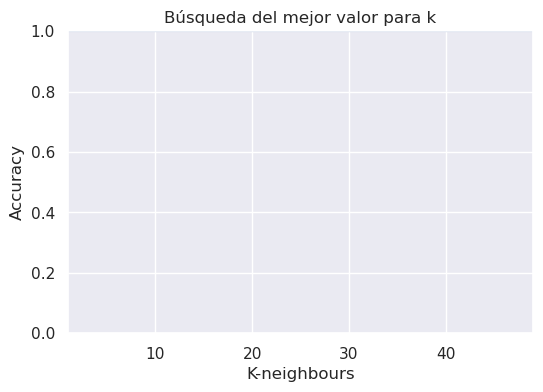

In [93]:
sns.set_theme()
plt.figure(dpi=100)
plt.plot(k_neighb, accuracy_maiz)
plt.ylim(0,1)
plt.xlim(1,np.max(k_neighb))
plt.xlabel('K-neighbours')
plt.ylabel('Accuracy')
plt.title('Búsqueda del mejor valor para k')
plt.show()

In [94]:
folds = 10
n_neighb = 3 #lo seteamos al max robusto (con vecinos tambien con buena performance)

accuracy_maiz = []

skf = StratifiedKFold(n_splits=folds, shuffle=True)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
    neigh = KNeighborsClassifier(n_neighbors=n_neighb).fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accuracy_maiz.append(accuracy_score(y_test, y_pred))
    

In [95]:
np.mean(accuracy_maiz)

1.0

<Figure size 600x400 with 1 Axes>

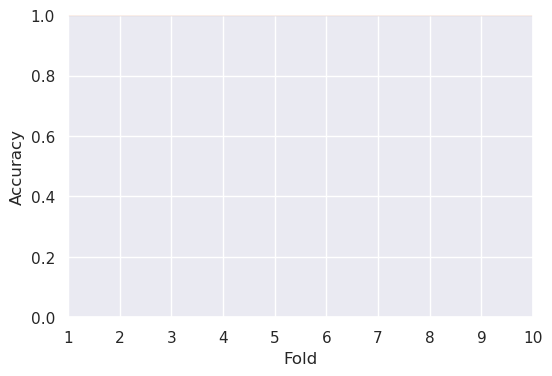

In [96]:
sns.set_theme()
plt.figure(dpi=100)
plt.plot(list(range(1,folds+1)), accuracy_maiz)
plt.plot(list(range(1,folds+1)), np.repeat(np.mean(accuracy_maiz), folds))
plt.fill_between(list(range(1,folds+1)), np.min(accuracy_maiz), np.max(accuracy_maiz), alpha=.3)
plt.ylim(0,1)
plt.xlim(1,folds)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

# Clasificamos soja vs resto del mundo

In [97]:
df_soja = df.copy()
df_soja.loc[df_soja.target.isin(['SOJA_1', 'SOJA_4']), 'target'] = 1
df_soja.loc[df_soja.target!=1, 'target'] = 0
df_soja.cultivo = df_soja.target.astype(int)
df_soja.rename(columns={'target': 'soja'}, inplace=True)

/var/tmp/ipykernel_4051071/1420462937.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_soja.cultivo = df_soja.target.astype(int)


In [98]:
df_soja

,Unnamed: 0.1,NDVI_1,TNDVI_1,RVI_1,SAVI_1,TSAVI_1,MSAVI_1,MSAVI2_1,IPVI_1,LAIFromNDVILog_1,...,MSAVI2_6_MAX,MSAVI2_6_MIN,IPVI_6_MAX,IPVI_6_MIN,LAIFromNDVILog_6_MAX,LAIFromNDVILog_6_MIN,LAIFromReflLinear_6_MAX,LAIFromReflLinear_6_MIN,LAIFromNDVIFormo_6_MAX,LAIFromNDVIFormo_6_MIN
0,0,0.294909,0.891577,1.836513,0.228713,-0.871737,0.207711,0.213346,0.647454,0.399040,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
1,1,0.354500,0.924392,2.098372,0.248241,-1.050501,0.218901,0.227279,0.677250,0.547650,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
2,2,0.265749,0.875071,1.723864,0.195119,-0.992671,0.173785,0.178379,0.632874,0.331662,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
3,3,0.329759,0.910911,1.984000,0.243527,-0.953812,0.218026,0.225289,0.664879,0.484036,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
4,4,0.326524,0.909134,1.969667,0.233421,-1.020433,0.206807,0.213882,0.663262,0.475927,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,461,0.320158,0.905626,1.941860,0.247406,-0.867436,0.224708,0.231434,0.660079,0.460104,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
462,462,0.330309,0.911213,1.986453,0.243959,-0.953364,0.218427,0.225716,0.665155,0.485421,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
463,463,0.308651,0.899250,1.892896,0.239855,-0.861503,0.218132,0.224330,0.654326,0.431946,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506
464,464,0.334020,0.913247,2.003094,0.246778,-0.951130,0.221018,0.228484,0.667010,0.494790,...,0.140128,0.140128,0.705595,0.705595,0.736567,0.736567,0.646271,0.646271,0.574506,0.574506


In [99]:
#buscamos el mejor k en este rango
k_neighb = list(range(1,50))


folds = 5

X = np.array(df_soja.iloc[:, :-1])
y = np.array(df_soja.iloc[:, -1:].values).flatten().astype(int)

accuracy_soja = []

for k in k_neighb:
    
    accu = []

    skf = StratifiedKFold(n_splits=folds, shuffle=True)

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]

        neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
        y_pred = neigh.predict(X_test)
        accu.append(accuracy_score(y_test, y_pred))
    
    accuracy_soja.append(np.mean(accu))
    

<Figure size 600x400 with 1 Axes>

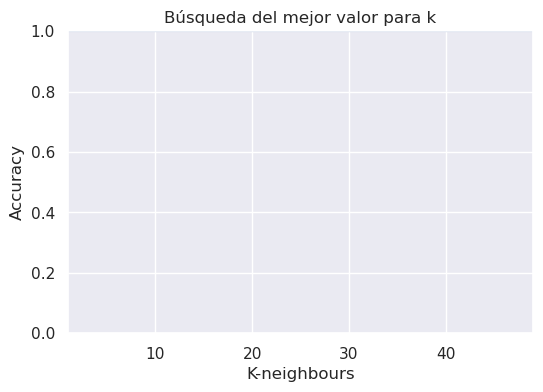

In [100]:
sns.set_theme()
plt.figure(dpi=100)
plt.plot(k_neighb, accuracy_soja)
plt.ylim(0,1)
plt.xlim(1,np.max(k_neighb))
plt.xlabel('K-neighbours')
plt.ylabel('Accuracy')
plt.title('Búsqueda del mejor valor para k')
plt.show()

In [101]:
folds = 10
n_neighb = 3 #lo seteamos al max robusto (con vecinos tambien con buena performance)

X = np.array(df_soja.iloc[:, :-1])
y = np.array(df_soja.iloc[:, -1:].values).flatten().astype(int)

accuracy_soja = []

skf = StratifiedKFold(n_splits=folds, shuffle=True)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
    neigh = KNeighborsClassifier(n_neighbors=n_neighb).fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accuracy_soja.append(accuracy_score(y_test, y_pred))

In [102]:
np.mean(accuracy_soja)

1.0

<Figure size 600x400 with 1 Axes>

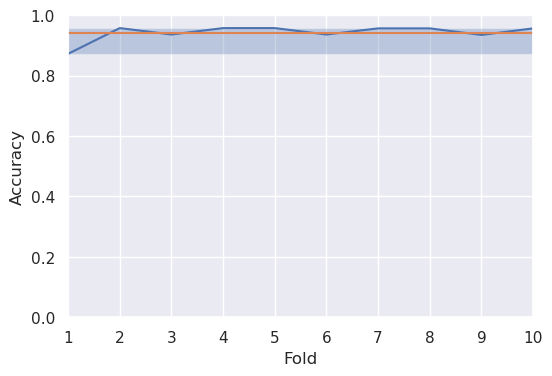

In [81]:
sns.set_theme()
plt.figure(dpi=100)
plt.plot(list(range(1,folds+1)), accuracy_soja)
plt.plot(list(range(1,folds+1)), np.repeat(np.mean(accuracy_soja), folds))
plt.fill_between(list(range(1,folds+1)), np.min(accuracy_soja), np.max(accuracy_soja), alpha=.3)
plt.ylim(0,1)
plt.xlim(1,folds)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()